# Исследование популярности компютерных игр в интернет-магазине "Стримчик"

Необходимо выявить определяющие успешность игры закономерности, чтобы выявить потенциально популярный продукт и спланировать рекламные кампании. Так же разработать принцип работы с даннымидля прогноза продаж на будущий год.

В работе предполагается несколько этапов:
- подгтовка данных, выявление ошибок и путей их появления
- подсчёт суммарныч продаж во всех регионах
- исследовательский анализ данных 
    - сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
    - как менялись продажи по платформам. За какой характерный срок появляются новые и исчезают старые платформы?
    - выявить актуальный период данных для построения прогноза на 2017 год
    - Какие платформы лидируют по продажам, растут или падают?
    - выявить как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков
    - рассмотреть общее распределение игр по жанрам
- определение для пользователя каждого региона (NA, EU, JP):
    - самых популярных платформ (топ-5). Различия в долях продаж
    - самых популярных жанров (топ-5)
    - влияние рейтинга ESRB на продажи в отдельном регионе?
- проверка гипотез
    - средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    - средние пользовательские рейтинги жанров Action и Sports разные


## Изучаем данные

In [2]:
# импортируем нужные библиотеки
import pandas as pd
import numpy as np
import seaborn as sb
import warnings
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats as st

Читаем полученые данные:

In [3]:
# читаем данные спомощью try..except и read_csv
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('/Users/refresh/Downloads/games.csv')

In [4]:
# выведем пять строк
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
# смотрим информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
# смотрим пропуски
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
# явные дубликаты
data.duplicated().sum()

0

**Столбцы:**

 1   Name - название игры

 2   Platform - платформа, на которой выпущена игра
 
 3   Year_of_Release - год выпуска
 
 4   Genre - жанр игры 
 
 5   NA_sales - продажи в Северной Америке (миллионы долларов)
 
 6   EU_sales - продажи в Европе (миллионы долларов)
 
 7   JP_sales - продажи в Японии (миллионы долларов)
 
 8   Other_sales - продажи в других странах (миллионы долларов)
 
 9   Critic_Score - оценка критиков (максимум 100)
 
 10   User_Score - оценка пользователей (максимум 10) 
 
 11  Rating - рейтинг от организации ESRB (англ. Entertainment Software Rating Board).Эта ассоциация определяет рейтинг    компьютерных игр и присваивает им подходящую возрастную категорию.
 
### Выводы ознакомления с информацией

- таблица состоит из 16715 строк;
- есть пропуски;
- сделать тип данных даты релиза целым(или "датой", если понадобиться); рейтинг пользователей заменим на float;
- явных дубликатов нет;
- есть заглавные буквы как в данных, так и в названиях столюцов, могут быть  неявные дубликаты.


## Предобработка данных

Исправляем названия столбцов:

In [8]:
# функция rename со словарем старых и новых названий
data = data.rename(columns={
    'Name' : 'name',
    'Platform' : 'platform',
    'Year_of_Release' : 'year_release',
    'Genre' : 'genre',
    'NA_sales' : 'na_sales',
    'EU_sales' : 'eu_sales',
    'JP_sales' : 'jp_sales',
    'Other_sales' : 'other_sales',
    'Critic_Score' : 'critic_score',
    'User_Score' : 'user_score',
    'Rating' : 'rating'
})
# проверка
data.columns

Index(['name', 'platform', 'year_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Приводим тип столбца с годом к целочисленному:

In [9]:
# приводим к целочисленному типу
# data['year_release'] = data['year_release'].astype('Int64')
data['year_release'] 

0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16710    2016.0
16711    2006.0
16712    2016.0
16713    2003.0
16714    2016.0
Name: year_release, Length: 16715, dtype: float64

Приведём к нижнему регистру все данные:

In [10]:
# цикл для понижения регистра по нужным столбцам
for column in ['name', 'platform', 'genre']:
    data[column] = data[column].str.lower()
# проверка
data.head(3)

,name,platform,year_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E


Ознакомимся со столбцами, где есть пропуски:

### 'name'

In [11]:
# смотрим пустые значения
data[data['name'].isna()]

,name,platform,year_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Эти строки не информативные, удалим их(так же есть два пропуска в столбце 'genre' и они тоже в этих строках). Думаю эти данные появились в результате ошибки записи или выгрузки данных.

In [12]:
# удаляем строки с пропусками
data = data.dropna(subset=['name'])
data[data['name'].isna()]

,name,platform,year_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


### 'year_release'

In [13]:
# выведем несколько строк
data[data['year_release'].isna()].head(5)

,name,platform,year_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Посмотрим, есть ли одинаковые игры, в которых пропущен год на одной платформе, и есть на другой платформе:

In [14]:
# выведем несколько строк
data[data['name'] == 'madden nfl 2004'].head(5)

,name,platform,year_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,madden nfl 2004,xb,2003.0,sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,madden nfl 2004,gc,2003.0,sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,madden nfl 2004,gba,2003.0,sports,0.22,0.08,0.00,0.01,70.0,6.6,E


Заполним годами из других платформ и проверим, все ли пропуски в годе релиза ушли:

In [15]:
# отключаем предупреждения
warnings.filterwarnings('ignore')
# циклом проходимся по индексам пустых значений
# присваиваем пустому году в строке значение(в данном случае минимальное, можно и максимальное) из среза таких же имён 
for i in data[data['year_release'].isna() == True].index:
    data['year_release'][i] = data.loc[data['name'] == data.loc[i]['name'], 'year_release'].max()

In [16]:
# проверка, уменьшилось ли количество пропусков
data['year_release'].isna().sum()

146

Заполнили 45% пустых значений в этом столбце. К остальным пропускам нет возможности получить год релиза, т к он не заполнен ковсем платформам.

### 'critic_score'

In [17]:
# пропуски
data['critic_score'].isna().sum()

8576

Т к нам в исследовании понадобятся данные игр с отсутствующими рейтингами, то заполним сейчас их нулями:

In [18]:
data['critic_score'] = data['critic_score'].fillna(0)

### 'user_score'

In [19]:
# смотрим значения и их частоту
data['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.7       2
0.9       2
1.9       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Значение "tbd" значит "предстоит определить"(to be determined). Такое значение заносится специально, чтобы показать, что тут не пропуск, а не определились какой ретинг поставить. Считаю эквивалентным заменить на Nan, т к задачи определить долю "непределившихся" у нас нет.

In [20]:
# заполняем значением nan
data[data['user_score'] == 'tbd'] = np.nan
data['user_score'].value_counts()

7.8    324
8      290
8.2    282
8.3    254
8.5    253
      ... 
0.7      2
0.9      2
1.9      2
0        1
9.7      1
Name: user_score, Length: 95, dtype: int64

В этом столбце очевидно должен быть тип данных float, т к оценка от 0 до 10 с шагом 0,1.

In [21]:
# меняем тип на float, игнорируем nan
data['user_score'] = data['user_score'].astype('float64', errors='ignore')

Т к нам в исследовании понадобятся данные игр с отсутствующими рейтингами, то заполним сейчас их нулями:

In [22]:
data['user_score'] = data['user_score'].fillna(0)

### 'rating'

In [23]:
# смотрим значения
data['rating'].value_counts()

T       2581
E       2415
M       1521
E10+    1050
K-A        3
RP         3
EC         1
AO         1
Name: rating, dtype: int64

In [24]:
data['rating'].isna().sum()

9138

Т к в исследовании нам надо будет считать продажи в зависимости от рейтинга, то заполним пропуски значением, которое указывает, что рейтинг либо не внесён, либо отсутсвует. К примеру nr(no rating).

In [25]:
data['rating'] = data['rating'].fillna('nr')

### 'platform'

In [26]:
# смотрим значения
data['platform'].value_counts()

ps2     1921
ds      1395
ps3     1244
x360    1178
ps      1152
psp     1086
pc       925
wii      880
xb       674
gba      560
3ds      464
gc       453
psv      423
ps4      386
n64      319
snes     239
xone     236
sat      173
wiiu     142
2600     133
nes       98
gb        98
dc        52
gen       27
ng        12
scd        6
ws         6
3do        3
tg16       2
pcfx       1
gg         1
Name: platform, dtype: int64

Дубликатов нет.

### 'genre'

In [27]:
# смотрим значения
data['genre'].value_counts()

action          2993
sports          1935
role-playing    1468
misc            1301
shooter         1224
adventure       1144
racing          1016
fighting         810
platform         749
strategy         644
simulation       636
puzzle           369
Name: genre, dtype: int64

Тоже в норме.

## Вывод предобработка данных

Преобразовали некоторые типы данных для удобства представления. Удалили немного неинформативных строк в таблице. Заполнили часть пропусков.
В даных осталось много пропусков, которые мы не можем сейчас восстановить. Все данные привели  к нижнему регистру, неявных дубликатов нет. В целом данных удалено минимальное количество, можно начинать анализ.

## Анализ данных

Посчитаем суммарно все продажи по каждой игре по всему миру и внесём в таблицу.

In [28]:
# суммируем продажи и заносим в новый столбец
data['world_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data.head(3)

,name,platform,year_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,0.0,0.0,nr,40.24
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52


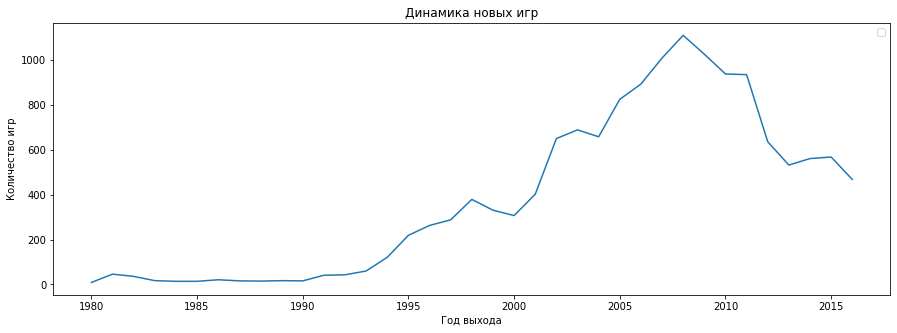

In [29]:
# группируем по году и названию игры, строим график с параметрами
data.pivot_table(index='year_release', values='name', aggfunc='count').plot(figsize=(15,5))
plt.title("Динамика новых игр")
plt.legend('')
plt.xlabel("Год выхода")
plt.ylabel("Количество игр");

Из графика видно, что с 1980 по 1993 года выпускалось примерно одинаково маленькое количество игр, т к показатель не привысил 60 шт. Рост начался с 1994 года, как видно на графике. Данные до 1994 можно считать не важными для исследования.

Пик роста был 2008 с показателем 1110 шт. Потом мы видим спад до 468 в 2016 г, предположу, что появились хорошие игры на планшетах и смартфонах, что заняло часть рынка покупателей.

,world_sales
platform,
ps2,1191.93
x360,958.84
ps3,929.40
wii,807.14
ps,717.24


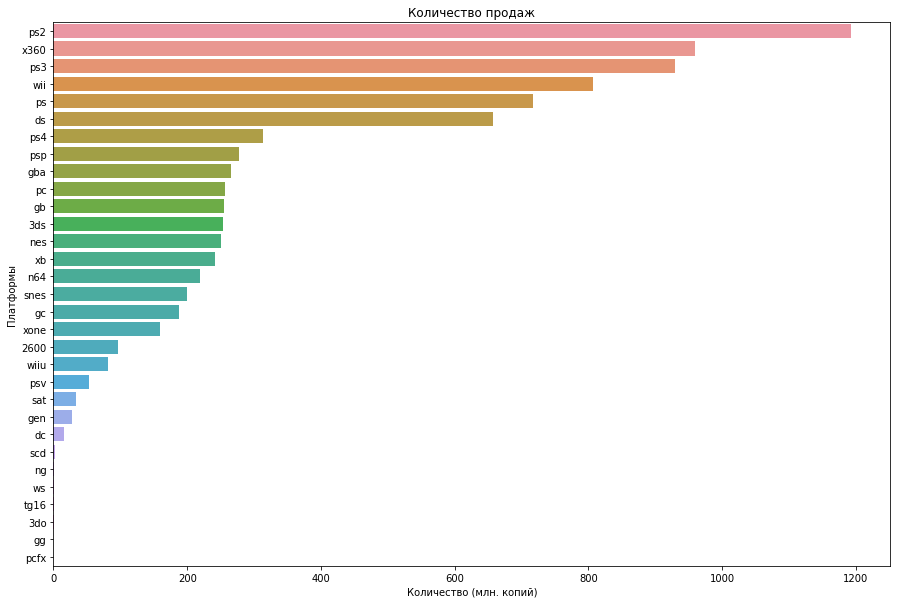

In [30]:
# группируем по платформа и общим продажам, сортируем по убыванию
platform_sale = data.pivot_table(index='platform', values='world_sales', aggfunc='sum').\
sort_values('world_sales', ascending=False)
# строим дианграму с параметрами
plt.figure(figsize=(15,10))
sb.barplot(x=platform_sale['world_sales'], y=platform_sale.index);
plt.xlabel("Количество (млн. копий)")
plt.ylabel("Платформы")
plt.title("Количество продаж");
# сохраняем топ 5 платформ по продажам
platform_sale = platform_sale.head(5)
platform_sale

Из графика видно, что есть очевидные лидеры по числу проданых копий за всё время, топ-5:
- ps2 - 1
- x360 - 2
- ps3 - 3
- wii - 4
- ps - 5

Посмотрим за какой срок появляются новые и исчезают старые платформы. Данные возьмём начиная с 1994 г. как мы вяснили в предыдущем вопросе.

In [31]:
# группируем продажи по платформе и году, срез данных от 1994 и по 5ти платформам
actual_platform_sale = data.query('year_release >= 1994 and platform in @platform_sale.index')\
    .pivot_table(index=['platform','year_release'],values='world_sales', aggfunc='sum')\
    .reset_index()

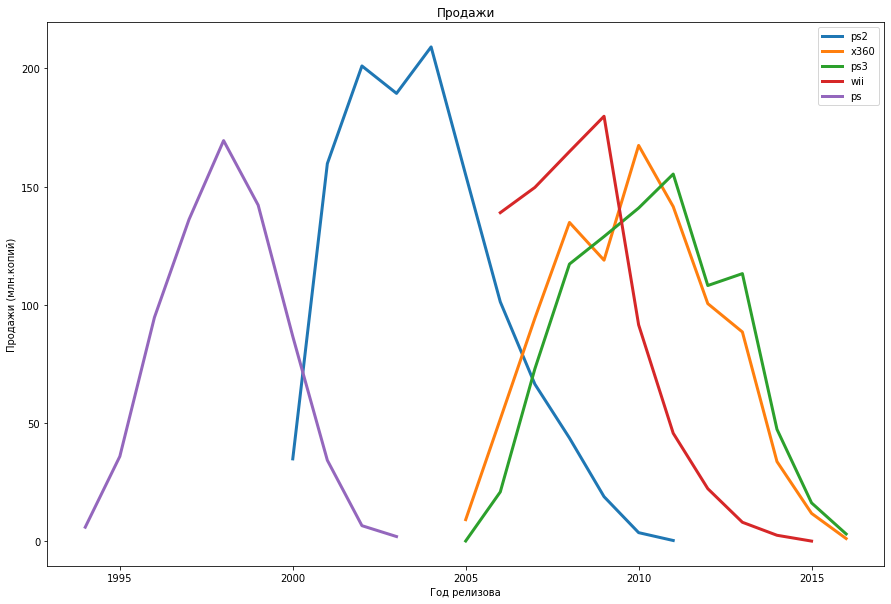

In [32]:
# параметры графика
plt.figure(figsize=(15,10))
plt.title('Продажи')
plt.xlabel('Год релизова')
plt.ylabel('Продажи (млн.копий)')
# в цикле по топовым платформам строим график платформы и продаж по годам
for i in platform_sale.index:
    for_lineplot = actual_platform_sale.query('platform == @i')
    sb.lineplot(for_lineplot['year_release'], for_lineplot['world_sales'], label=i, linewidth = 3)

###### ***Выводы***

Из грфика видно, что платформы в среднем живут 10 лет. Пик продаж наступает после пяти лет продаж платформы. Самые продаваемые были ps2, wii, ps. Платформа wii имела быстрый старт, в отличии от других лидеров. Поскольку некоторые платформы стали не актуальны и индустрия актуальная и следовательно динамичная считаю логичным в исследовании брать данные с 2014 года.

,world_sales
platform,
ps4,188.01
xone,85.74
3ds,42.31
wiiu,20.57
ps3,19.46


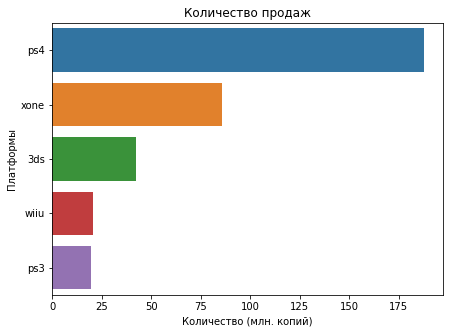

In [33]:
# убираем из оновной таблицы неактуальные данные для дальнейшего анализа
data = data.query('year_release > 2014')
platform_sale = data.pivot_table(index='platform', values='world_sales', aggfunc='sum').\
sort_values('world_sales', ascending=False)
# сохраняем топ 5 платформ по продажам
platform_sale = platform_sale.head(5)
display(platform_sale)
actual_platform_sale = data.query('year_release > 2014 and platform in @platform_sale.index')\
    .pivot_table(index=['platform','year_release'],values='world_sales', aggfunc='sum')\
    .reset_index()
# строим дианграму с параметрами
plt.figure(figsize=(7,5))
sb.barplot(x=platform_sale['world_sales'], y=platform_sale.index);
plt.xlabel("Количество (млн. копий)")
plt.ylabel("Платформы")
plt.title("Количество продаж");

Есть новый топ-5.

Построим ящики с усами по по продажам на платформах и оценим распределение:

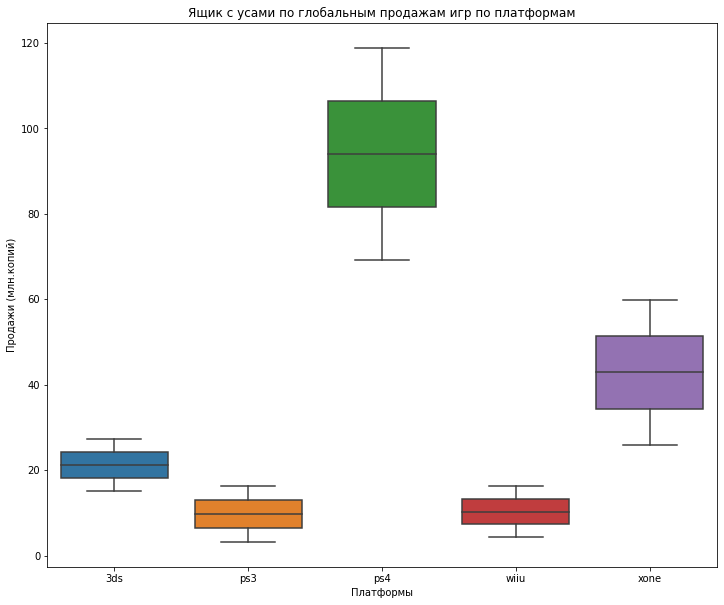

In [34]:
plt.figure(figsize=(12,10))
# строим ящики с усами для платформ
sb.boxplot(data=actual_platform_sale, x='platform', y='world_sales')
plt.title('Ящик с усами по глобальным продажам игр по платформам')
plt.xlabel('Платформы')
plt.ylabel('Продажи (млн.копий)');

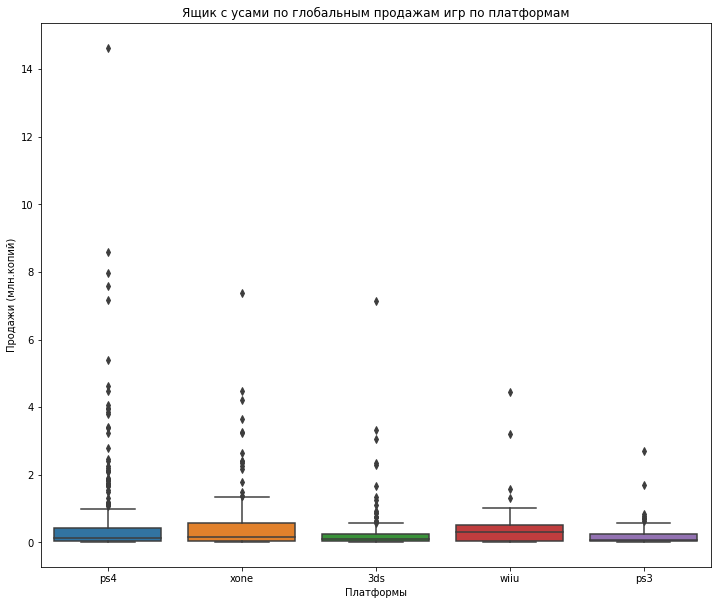

In [35]:
actual_platform_sale2 = data.query('platform in @platform_sale.index')
plt.figure(figsize=(12,10))
# строим ящики с усами для платформ
sb.boxplot(data=actual_platform_sale2, x='platform', y='world_sales')
plt.title('Ящик с усами по глобальным продажам игр по платформам')
plt.xlabel('Платформы')
plt.ylabel('Продажи (млн.копий)');

***Вывод***

Самые высокие продажи от 2014(включительно) демонстрирует ps4, далее xone, 3ds, wiiu и ps3. 
Медианное значение у всех разное, лидирует с большим разрывом ps4, после идёт xone, соответственно средий доход в стране присутствия у них выше. У платформы ps4 верхняя граница ящика выше, к тому же по выбросам видно, что были большие значения. У xone и 3ds тоже есть выбросы в больших значениях. Это говорит о том, что в некоторые периоды у них тоже продажи были высокими.

Посмотрим, как влияют на продажи внутри одной популярной платформы(возьмём  ps4) отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

Коэффициент корреляции Продажи / Отзывы пользователей  -0.06


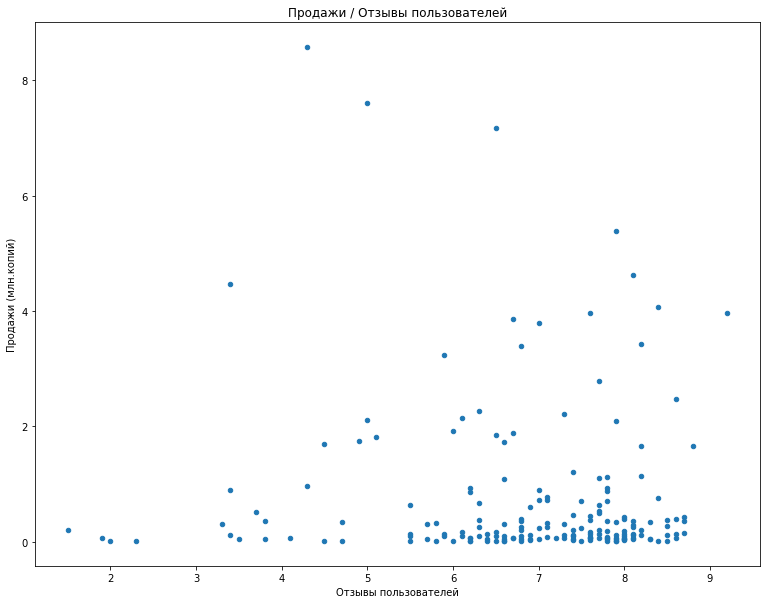

Коэффициент корреляции Продажи / Отзывы критиков  0.39


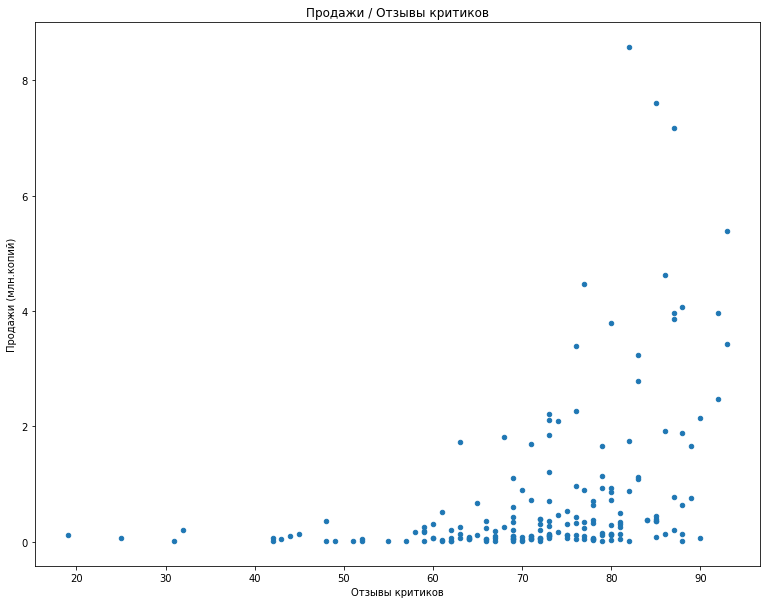

In [36]:
# данные по ps2
# убираем нули
ps2_platform = data.query('platform == "ps4" and user_score > 0 and critic_score >0')
# график
ps2_platform.plot(x='user_score', y='world_sales', kind='scatter', figsize=(13,10))
plt.title('Продажи / Отзывы пользователей')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Продажи (млн.копий)');
# вывод на экран коэффициента корреляции
print('Коэффициент корреляции Продажи / Отзывы пользователей ', round(ps2_platform['user_score'].corr(ps2_platform['world_sales']), 2))
plt.show()
print('Коэффициент корреляции Продажи / Отзывы критиков ', round(ps2_platform['critic_score'].corr(ps2_platform['world_sales']), 2))

ps2_platform.plot(x='critic_score', y='world_sales', kind='scatter', figsize=(13,10))
plt.title('Продажи / Отзывы критиков')
plt.xlabel('Отзывы критиков')
plt.ylabel('Продажи (млн.копий)');

***Выводы***

Зависимость между продажами и отзывами пользователей низкая. Зависимость продаж от оценок критиков уже средняя и больше влияет.

Посмотрим зависимость на други top-5 платформах:

Коэффициент корреляции Продажи / Отзывы пользователей  ps4 -0.06


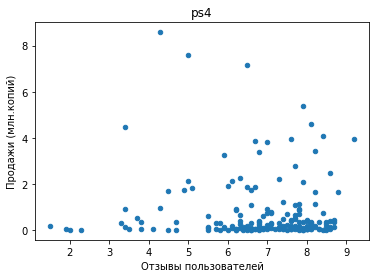

Коэффициент корреляции Продажи / Отзывы критиков  ps4 0.39


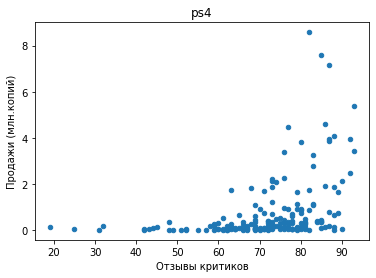

Коэффициент корреляции Продажи / Отзывы пользователей  xone -0.07


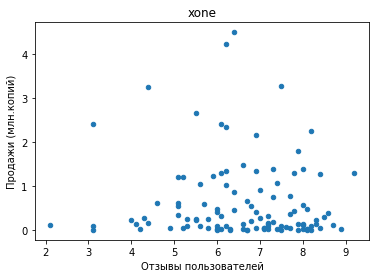

Коэффициент корреляции Продажи / Отзывы критиков  xone 0.42


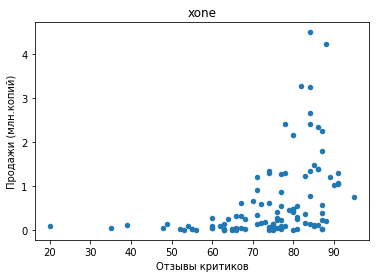

Коэффициент корреляции Продажи / Отзывы пользователей  3ds 0.24


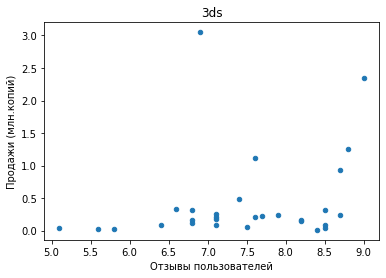

Коэффициент корреляции Продажи / Отзывы критиков  3ds 0.18


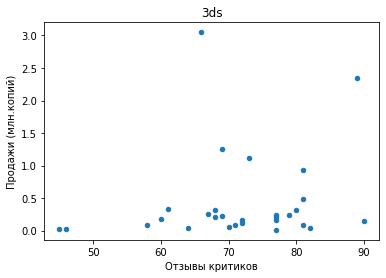

Коэффициент корреляции Продажи / Отзывы пользователей  wiiu 0.35


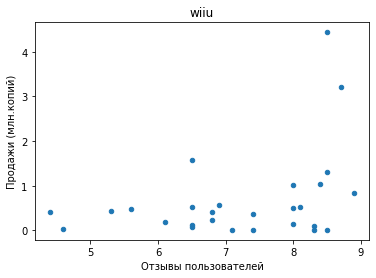

Коэффициент корреляции Продажи / Отзывы критиков  wiiu 0.33


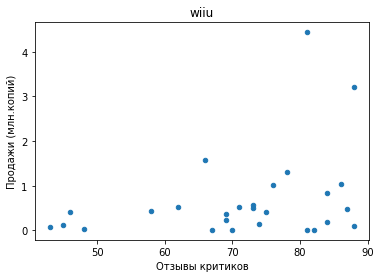

Коэффициент корреляции Продажи / Отзывы пользователей  ps3 nan


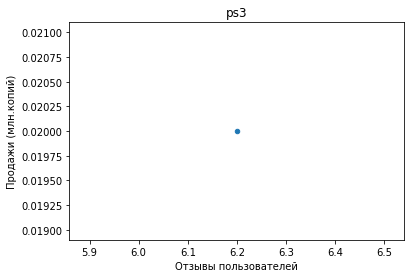

Коэффициент корреляции Продажи / Отзывы критиков  ps3 nan


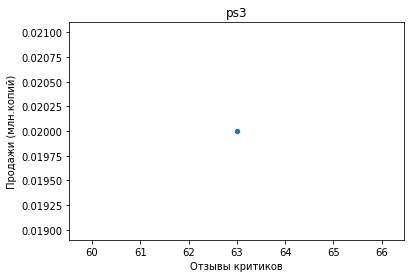

In [37]:
# циклдля построения графика и корреляции по остальным платформам
for i in platform_sale.index:
    data_platform = data.query('platform == @i and user_score > 0 and critic_score >0')
    cor1 = round(data_platform['user_score'].corr(data_platform['world_sales']), 2)
    cor2 = round(data_platform['critic_score'].corr(data_platform['world_sales']), 2)
    data_platform.plot(x='user_score', y='world_sales', kind='scatter')
    plt.title(i)
    plt.xlabel('Отзывы пользователей')
    plt.ylabel('Продажи (млн.копий)');
    print('Коэффициент корреляции Продажи / Отзывы пользователей ', i, cor1)
    plt.show()
    data_platform.plot(x='critic_score', y='world_sales', kind='scatter')
    plt.title(i)
    plt.xlabel('Отзывы критиков')
    plt.ylabel('Продажи (млн.копий)');
    print('Коэффициент корреляции Продажи / Отзывы критиков ', i, cor2) 
    plt.show()

***Вывод***

Зависимости от оценок пользователей почти не наблюдается, есть средняя зависимость от оцеок критиков.


Посмотрим общее распределение игр по жанрам.

,name
genre,
action,400
role-playing,132
adventure,106
sports,98
shooter,77
misc,59
racing,41
fighting,35
simulation,30


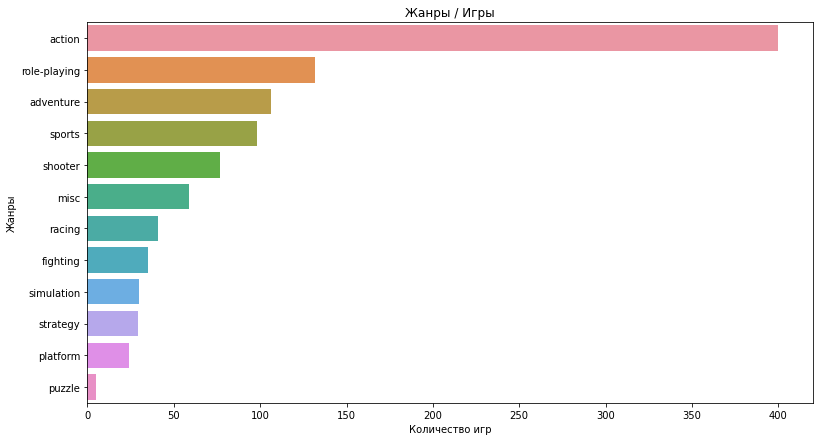

In [38]:
# группировка и график
genre_count = data.pivot_table(index='genre', values='name', aggfunc='count').sort_values('name',ascending=False)
plt.figure(figsize=(13,7))
sb.barplot(x=genre_count['name'], y=genre_count.index);
plt.xlabel("Количество игр")
plt.ylabel("Жанры")
plt.title("Жанры / Игры");
genre_count

,world_sales
genre,
shooter,105.53
action,100.56
sports,63.95
role-playing,55.82
misc,12.60
fighting,12.29
adventure,11.88
racing,10.81
platform,8.85


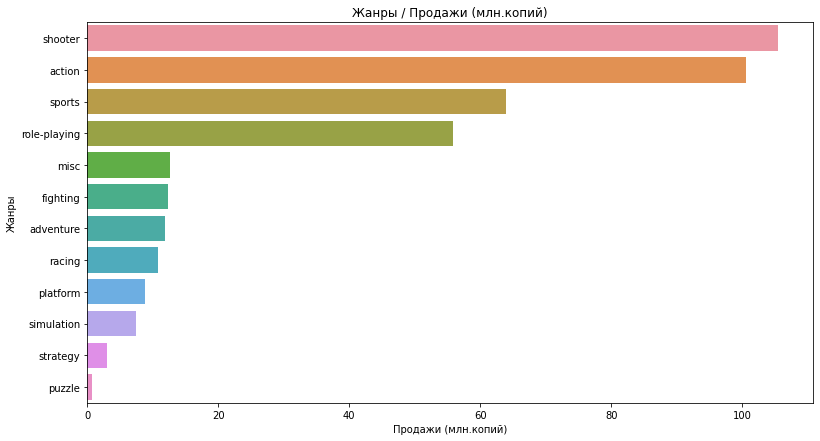

In [39]:
# группировка и график
genre_sale = data.pivot_table(index='genre', values='world_sales', aggfunc='sum').sort_values('world_sales',ascending=False)
plt.figure(figsize=(13,7))
sb.barplot(x=genre_sale['world_sales'], y=genre_sale.index);
plt.xlabel("Продажи (млн.копий)")
plt.ylabel("Жанры")
plt.title("Жанры / Продажи (млн.копий)");
genre_sale

Посмотрим диаграмму размаха:

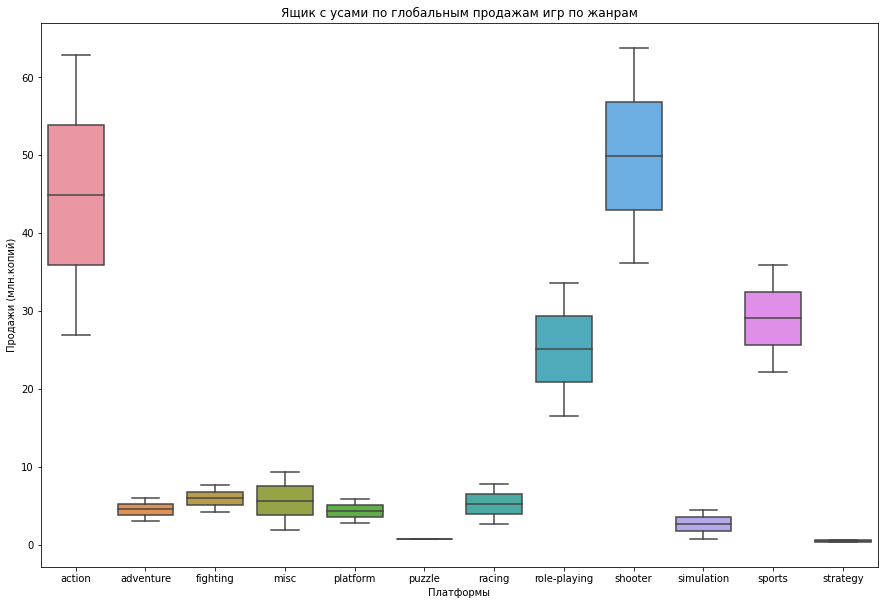

In [40]:
actual_genre_sale = data.query('platform in @platform_sale.index')\
    .pivot_table(index=['genre','year_release'],values='world_sales', aggfunc='sum')\
    .reset_index()
plt.figure(figsize=(15,10))
# строим ящики с усами для платформ
sb.boxplot(data=actual_genre_sale, x='genre', y='world_sales')
plt.title('Ящик с усами по глобальным продажам игр по жанрам')
plt.xlabel('Платформы')
plt.ylabel('Продажи (млн.копий)');

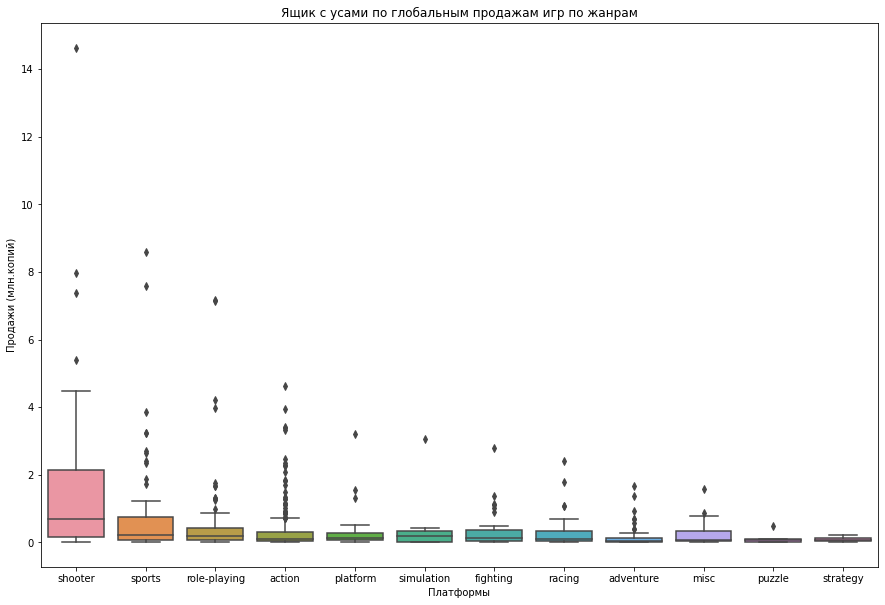

In [41]:
actual_genre_sale2 = data.query('platform in @platform_sale.index')
plt.figure(figsize=(15,10))
# строим ящики с усами для платформ
sb.boxplot(data=actual_platform_sale2, x='genre', y='world_sales')
plt.title('Ящик с усами по глобальным продажам игр по жанрам')
plt.xlabel('Платформы')
plt.ylabel('Продажи (млн.копий)');

## Вывод по анализу данных

Из данных видно, что развитие игровой индустрии на платформах масштабно началось с 1994 года. Данные за предыдущие периоды малы и мы отбросили. Пик роста был 2008 с показателем 1110 шт. Потом мы видим спад до 468 в 2016 г, предположу, что появились хорошие игры на компьютерах, планшетах и смартфонах, что заняло часть рынка покупателей. Самые продаваемые были ps2, wii, ps. Платформа wii имела быстрый старт, в отличии от других лидеров.

Из грфика видно, что платформы в среднем живут 10 лет. Пик продаж наступает после пяти лет продаж платформы. Самые продаваемые были ps2, wii, ps. Платформа wii имела быстрый старт, в отличии от других лидеров. Поскольку некоторые платформы стали не актуальны и индустрия актуальная и следовательно динамичная считаю логичным в исследовании брать данные с 2014 года.

Зависимость продаж от оценок пользователей мала, но достигает средних значений от оценок критиков - компании больше доверяют профессионалам. Но в целом зависимость скорее более сложная. 

Очень много игр выпускается в жанре action(400). В популярности жанров есть заметная градация: первое место action, далее role-plauing и adventure.
Самые прибыльные жанры action, sports, shooter. 
В продажах жанрах есть явные лидеры по количеству продаж и те, кто в разы менее популярен: лидер shooter, action и sports. Медианные продажи высокие у shooter, action и sports, role-plauing, у них так же высокие интервал разброса значений и есть выбросы с большими значениями, что указывает на их большую прибыльность.

## Портрет Пользователя каждого региона


### Платформа

,na_sales
platform,
ps4,63.74
xone,49.95
3ds,10.12
wiiu,8.68
x360,7.87


,eu_sales
platform,
ps4,83.54
xone,27.94
pc,9.04
3ds,7.05
ps3,6.85


,jp_sales
platform,
3ds,23.50
ps4,12.05
psv,8.30
ps3,4.69
wiiu,4.12


,other_sales
platform,
ps4,28.68
xone,7.67
ps3,2.39
3ds,1.64
wiiu,1.44


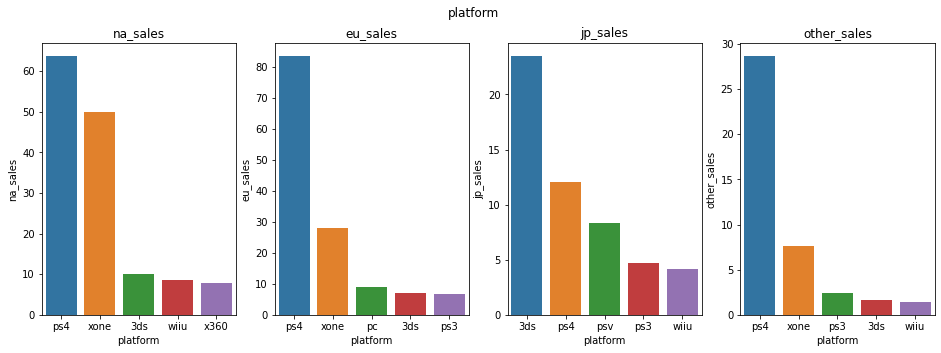

In [43]:
# функция для вычисления региональных значений и построения графиков
def func(krit):
    fig, axes = plt.subplots(1, 4, figsize=(16, 5))
    for i, ax in zip(['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], axes):
        pivot = data.pivot_table(index=krit, values=i, aggfunc='sum').sort_values(i, ascending=False).head(5)
        display(pivot)
        ax.set_xlabel('Платформа')
        ax.set_ylabel('Продажи(млн.копий)')
        ax.set_title(i);
        sb.barplot(data=pivot, x=pivot.index, y=pivot[i], ax=ax)
        fig.suptitle(krit)
func('platform')

### Жанр

,na_sales
genre,
shooter,48.07
action,33.30
sports,26.21
role-playing,19.82
fighting,5.52


,eu_sales
genre,
shooter,40.20
action,34.14
sports,27.58
role-playing,17.21
racing,6.50


,jp_sales
genre,
action,22.67
role-playing,13.41
shooter,3.79
misc,3.19
adventure,2.22


,other_sales
genre,
shooter,13.47
action,10.45
sports,8.51
role-playing,5.38
fighting,1.56


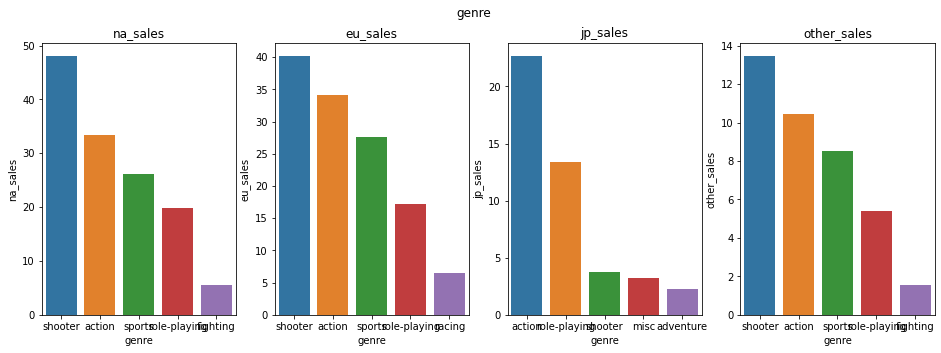

In [42]:
# применение функции к жанру
func('genre')

### Рейтинг

,na_sales
rating,
M,46.97
nr,37.42
E,26.25
T,22.69
E10+,16.83


,eu_sales
rating,
M,45.52
nr,35.53
E,34.39
T,20.18
E10+,10.21


,jp_sales
rating,
nr,32.89
T,7.33
E,5.25
M,4.29
E10+,3.20


,other_sales
rating,
M,14.24
nr,11.12
E,8.49
T,6.81
E10+,3.74


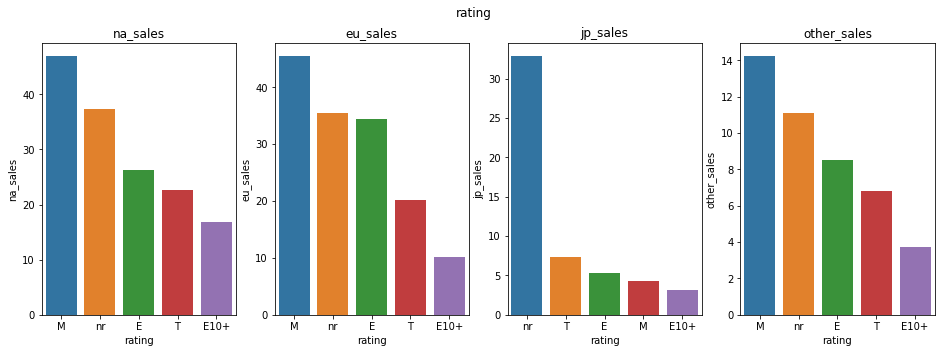

In [43]:
# применение функции к рейтингу
func('rating')

## Выводы

Свеверная Америка:
- лидирующие платформы ps4 и xone
- лидирующие жанры shooter и action
- популярны игры с рейтингом "старше 17 лет" и  "для всех"(второе место занимают игры с рейтингом "нет рейтинга")

Европа:
- лидирующие платформы ps4 и xone
- лидирующие жанры shooter и action
- популярны игры с рейтингом "старше 17 лет" и  "для всех"(второе место занимают игры с рейтингом "нет рейтинга")

Япония:
- лидирующие платформы 3ds и ps4
- лидирующие жанры action и role-playing
- самые популярные игры не имеют рейтига(надо заполнять данные по Японии), далее идут игры с рейтингом "13 лет и старше" и "для всех"

Продажи в остальном мире:
- лидирующие платформы ps4 и xone
- лидирующие жанры shooter и action
- популярны игры с рейтингом "старше 17 лет" и  "для всех"(второе место занимают игры с рейтингом "нет рейтинга")
 

Портреты пользователей Северной Америки и Европы очень схожи. Япония отличается как по платформам, так и по жанрам, игры предпочитаются с более "мягким" контентом для детей. В большом количестве рейтинг организации ESRB отсутсвует, для корретного прогноза его надо заполнять. Продажи в остальном мире похожи на продажи в Северной Америке и Европе.


## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза обычно идёт со знаком равенства.

Нулевая гипотеза Н0 - Средние пользовательские рейтинги платформ Xbox, One и PC одинаковые

Альтернативная гипотеза Н1 - Средние пользовательские рейтинги платформ Xbox, One и PC отличаются

Уровень критической значимости заданим 1% для большей уверенности в результатх исследования.

In [44]:
# формируем выборки удаляем пропуски
sample1 = data.loc[data['platform'] == 'xone', 'user_score'].dropna()
sample2 = data.loc[data['platform'] == 'pc', 'user_score'].dropna()
# удаляем пропуски
# уровень критической значимости
alpha = .01
# делаем t-test для двух выборок, дисперсии предполагаем разные
t_st, p_val = st.ttest_ind(sample1, sample2, equal_var=False)
# выводы и проверка гипотезы
print(f't-критерий составил {round(t_st, 3)}')
print(f'Рассчитанный t-критерий дает достигаемый уровень значимости (p-value) равный {round(p_val,3)}')
if p_val < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не можем отвергнуть нулевую гипотезу')

t-критерий составил -0.577
Рассчитанный t-критерий дает достигаемый уровень значимости (p-value) равный 0.565
Не можем отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что хотя средние рейтинги этих двух платформ и неодинаквы, но с вероятностью в 56% такое или большее различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними рейтингами.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза Н0 - Средние пользовательские рейтинги жанров Action и Sports  равны.

Альтернативная гипотеза Н1 - Средние пользовательские рейтинги жанров Action и Sports отличаются.

Уровень критической значимости заданим 1% для большей уверенности в результатх исследования.

In [45]:
# формируем выборки
sample3 = data.loc[data['genre'] == 'action', 'user_score'].dropna()
sample4 = data.loc[data['genre'] == 'sports', 'user_score'].dropna()
# уровень критической значимости
alpha = .01
# делаем t-test для двух выборок, дисперсии предполагаем разные
t_st, p_val = st.ttest_ind(sample3, sample4, equal_var=False)
# выводы и проверка гипотезы
print(f't-критерий составил {round(t_st, 3)}')
print(f'Рассчитанный t-критерий дает достигаемый уровень значимости (p-value) равный {round(p_val,3)}')
if p_val < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не можем отвергнуть нулевую гипотезу')

t-критерий составил -3.331
Рассчитанный t-критерий дает достигаемый уровень значимости (p-value) равный 0.001
Отвергаем нулевую гипотезу


Полученное значение p-value = 0,001 говорит о том, с вероятностью почти 0,1% такое различие пользовательских рейтингов жанров Action и Sports можно получить случайно — то есть почти никогда. Это явно слишком малая вероятность, чтобы делать вывод о равенстве между ними.

In [46]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


## Вывод

Для начала в нашем исследовании мы преобразовали некоторые типы данных для удобства представления. Удалили немного неинформативных строк в таблице. Заполнили часть пропусков и в часть поставили временное значение, чтобы не терять данные для анализа. Все данные привели к нижнему регистру, неявных дубликатов нет. В целом данных удалено минимальное количество, что хорошо для анализа.


Из данных видно, что развитие игровой индустрии на платформах масштабно началось с 1994 года. Данные за предыдущие периоды малы и мы отбросили. Пик роста был 2008 с показателем 1110 шт. Потом мы видим спад до 468 в 2016 г, предположу, что появились хорошие игры на компьютерах, планшетах и смартфонах, что заняло часть рынка покупателей. Есть топ-5 платфом по мировым продажам: 1 - ps2,2 - x360,3 - ps3, 4 - wii, 5 - ps. Платформы в среднем живут 10 лет. Пик продаж наступает после пяти лет продаж платформы. Самые продаваемые были ps2, wii, ps. Платформа wii имела быстрый старт, в отличии от других лидеров. Поскольку некоторые платформы стали не актуальны и индустрия актуальная и следовательно динамичная считаю логичным в исследовании брать данные с 2014 года.


Самые высокие продажи от 2014(включительно) демонстрирует ps4, далее xone, 3ds, wiiu и ps3. Медианное значение у всех разное, лидирует с большим разрывом ps4, после идёт xone, соответственно средий доход в стране присутствия у них выше. У платформы ps4 верхняя граница ящика выше, к тому же по выбросам видно, что были большие значения. У xone и 3ds тоже есть выбросы в больших значениях. Это говорит о том, что в некоторые периоды у них тоже продажи были высокими.
Зависимость продаж от оценок пользователей мала, но достигает средних значений от оценок критиков - компании больше доверяют профессионалам. Но в целом зависимость скорее более сложная.
Очень много игр выпускается в жанре action(400). В популярности жанров есть заметная градация: первое место action, далее role-plauing и adventure. Самые прибыльные жанры action, sports, shooter. В продажах жанрах есть явные лидеры по количеству продаж и те, кто в разы менее популярен: лидер shooter, action и sports. Медианные продажи высокие у shooter, action и sports, role-plauing, у них так же высокие интервал разброса значений и есть выбросы с большими значениями, что указывает на их большую прибыльность.


Свеверная Америка:
* лидирующие платформы ps4 и xone
* лидирующие жанры shooter и action
* популярны игры с рейтингом "старше 17 лет" и "для всех"(второе место занимают игры с рейтингом "нет рейтинга")

Европа:
* лидирующие платформы ps4 и xone
* лидирующие жанры shooter и action
* популярны игры с рейтингом "старше 17 лет" и "для всех"(второе место занимают игры с рейтингом "нет рейтинга")

Япония:
* лидирующие платформы 3ds и ps4
* лидирующие жанры action и role-playing
* самые популярные игры не имеют рейтига(надо заполнять данные по Японии), далее идут игры с рейтингом "13 лет и старше" и "для всех"

Продажи в остальном мире:
* лидирующие платформы ps4 и xone
* лидирующие жанры shooter и action
* популярны игры с рейтингом "старше 17 лет" и "для всех"(второе место занимают игры с рейтингом "нет рейтинга")


Портреты пользователей Северной Америки и Европы очень схожи. Япония отличается как по платформам, так и по жанрам, игры предпочитаются с более "мягким" контентом для детей. В большом количестве рейтинг организации ESRB отсутсвует, для корретного прогноза его надо заполнять. Продажи в остальном мире похожи на продажи в Северной Америке и Европе.